In [1]:
import cv2
print(cv2.__version__)


4.10.0


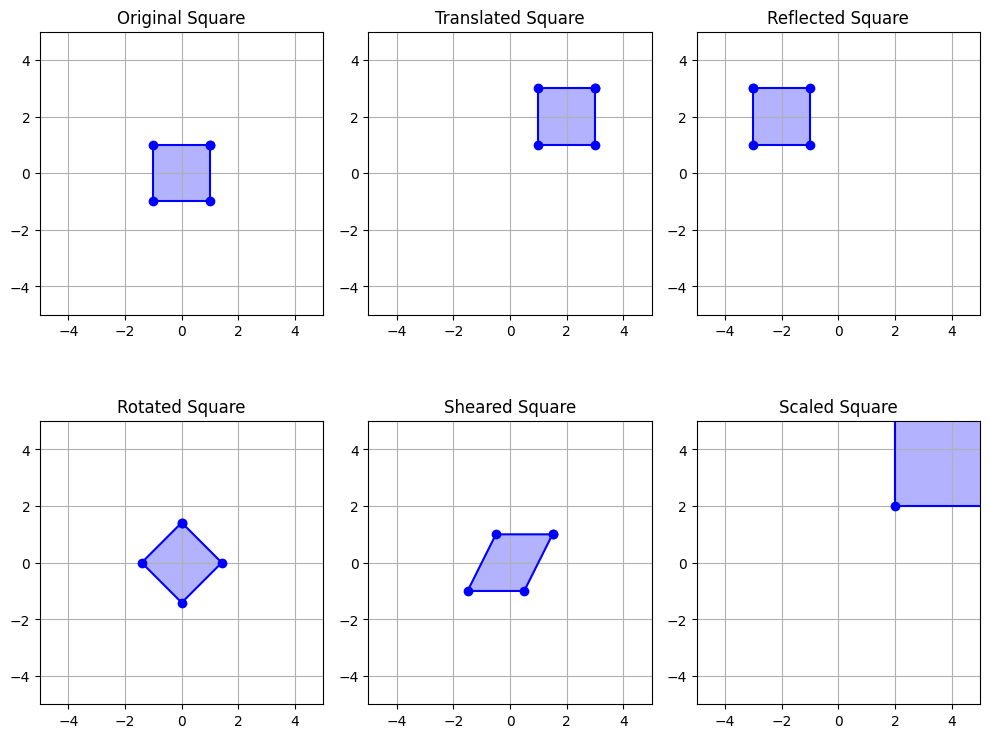

In [26]:
import numpy as np
import matplotlib.pyplot as plt

square = np.array([[1, 1], [1, -1], [-1, -1], [-1, 1], [1, 1]])  # A square with side 2

# Plotting function to visualize transformations
def plot_shape(shape, title="2D Object"):
    plt.plot(shape[:, 0], shape[:, 1], 'bo-')
    plt.fill(shape[:, 0], shape[:, 1], 'b', alpha=0.3)
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.title(title)
    plt.grid(True)

# 1. Translation
def translate(shape, tx, ty):
    translation_matrix = np.array([[1, 0, tx],
                                   [0, 1, ty],
                                   [0, 0, 1]])
    homogenous_shape = np.hstack((shape, np.ones((shape.shape[0], 1))))  # Convert to homogenous coordinates
    translated_shape = (translation_matrix @ homogenous_shape.T).T
    return translated_shape[:, :2]

# 2. Scaling
def scale(shape, sx, sy):
    scaling_matrix = np.array([[sx, 0, 0],
                               [0, sy, 0],
                               [0, 0, 1]])
    homogenous_shape = np.hstack((shape, np.ones((shape.shape[0], 1))))  # Convert to homogenous coordinates
    scaled_shape = (scaling_matrix @ homogenous_shape.T).T
    return scaled_shape[:, :2]

# 3. Rotation
def rotate(shape, angle):
    angle = np.deg2rad(angle)  # Convert angle to radians
    rotation_matrix = np.array([[np.cos(angle), -np.sin(angle), 0],
                                [np.sin(angle), np.cos(angle), 0],
                                [0, 0, 1]])
    homogenous_shape = np.hstack((shape, np.ones((shape.shape[0], 1))))  # Convert to homogenous coordinates
    rotated_shape = (rotation_matrix @ homogenous_shape.T).T
    return rotated_shape[:, :2]

# 4. Shearing
def shear_x(shape, shear_factor):
    shear_matrix = np.array([[1, shear_factor, 0],
                             [0, 1, 0],
                             [0, 0, 1]])
    homogenous_shape = np.hstack((shape, np.ones((shape.shape[0], 1))))  # Convert to homogenous coordinates
    sheared_shape = (shear_matrix @ homogenous_shape.T).T
    return sheared_shape[:, :2]

# 5. Reflection across Y-axis
def reflect_y(shape):
    reflection_matrix = np.array([[-1, 0, 0],
                                  [0, 1, 0],
                                  [0, 0, 1]])
    homogenous_shape = np.hstack((shape, np.ones((shape.shape[0], 1))))  # Convert to homogenous coordinates
    reflected_shape = (reflection_matrix @ homogenous_shape.T).T
    return reflected_shape[:, :2]

# Perform composite transformation: Translate, Scale, Rotate, Shear
translated_square = translate(square, 2, 2)
scaled_square = scale(translated_square, 2, 2)
rotated_square = rotate(square, 45)
sheared_square = shear_x(square, 0.5)
reflected_square=reflect_y(translated_square)
# Plot each transformation
plt.figure(figsize=(10, 8))

# Plot original shape
plt.subplot(2, 3, 1)
plot_shape(square, "Original Square")

# Plot translated shape
plt.subplot(2, 3, 2)
plot_shape(translated_square, "Translated Square")

# Plot scaled shape
plt.subplot(2, 3, 6)
plot_shape(scaled_square, "Scaled Square")

# Plot rotated shape
plt.subplot(2, 3, 4)
plot_shape(rotated_square, "Rotated Square")

# Plot sheared shape
plt.subplot(2, 3, 5)
plot_shape(sheared_square, "Sheared Square")

plt.subplot(2, 3, 3)
plot_shape(reflected_square, "Reflected Square")

plt.tight_layout()
plt.show()


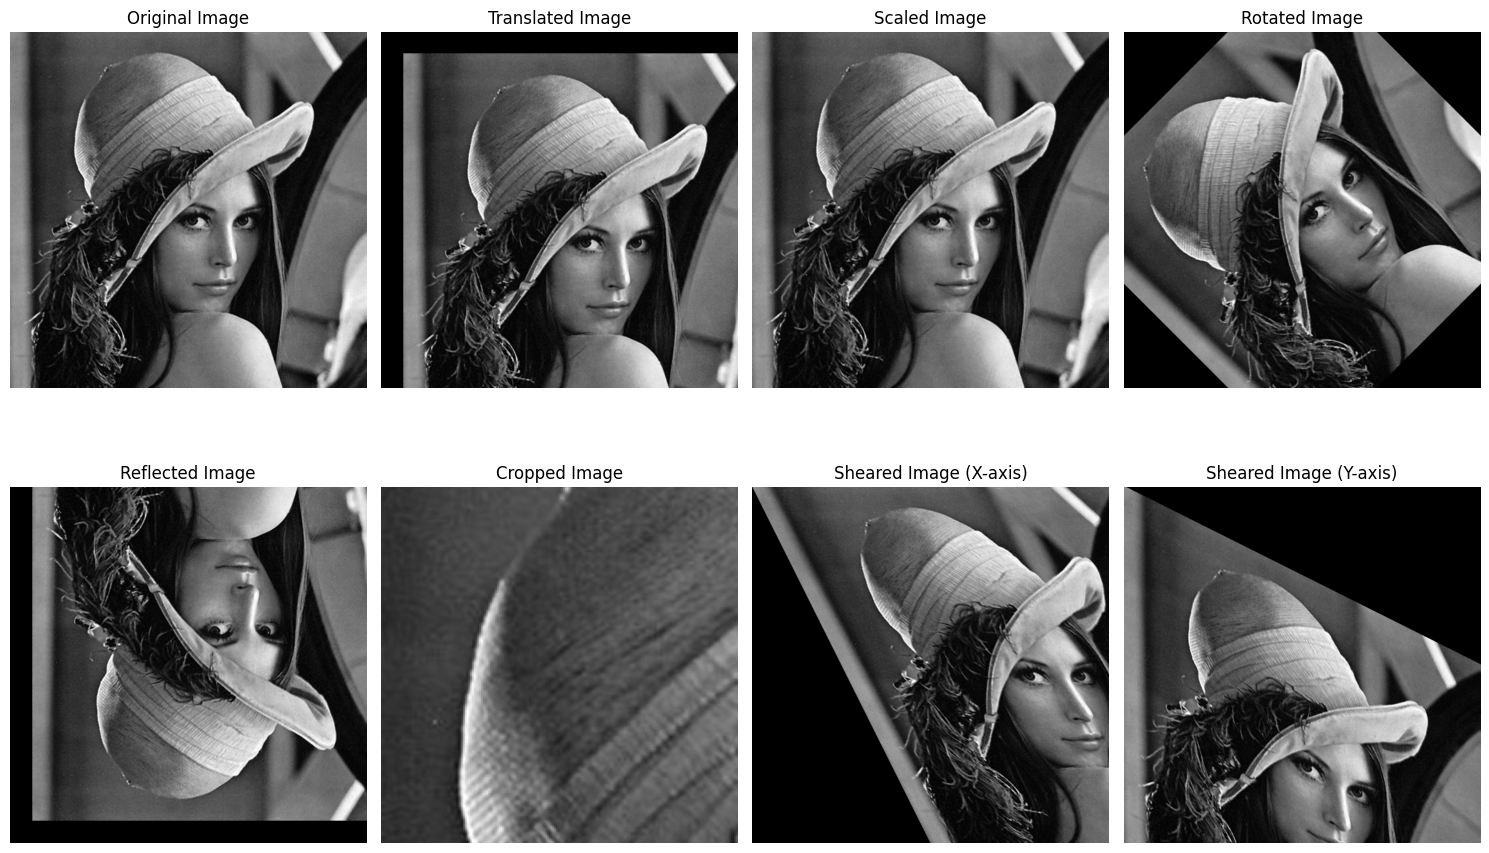

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
img = cv2.imread("C:/Users/Hp/Desktop/cv_vscode/test_img.jpeg")

# Convert BGR image to RGB for plt.imshow
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 1. Image Translation
def translate(image, tx, ty):
    translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
    return cv2.warpAffine(image, translation_matrix, (image.shape[1], image.shape[0]))

# 2. Image Scaling
def scale(image, fx, fy):
    return cv2.resize(image, None, fx=fx, fy=fy)

# 3. Image Rotation
def rotate(image, angle):
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    return cv2.warpAffine(image, rotation_matrix, (w, h))

# 4. Image Reflection
def reflect(image, axis):
    return cv2.flip(image, axis)

# 5. Cropping
def crop(image, x, y, w, h):
    return image[y:y+h, x:x+w]

# 6. Shearing in x-axis
def shear_x(image, shear_factor):
    rows, cols = image.shape[:2]
    M = np.float32([[1, shear_factor, 0], [0, 1, 0]])
    return cv2.warpAffine(image, M, (cols, rows))

# 7. Shearing in y-axis
def shear_y(image, shear_factor):
    rows, cols = image.shape[:2]
    M = np.float32([[1, 0, 0], [shear_factor, 1, 0]])
    return cv2.warpAffine(image, M, (cols, rows))

# Example usage
translated_image = translate(img, 50, 50)
scaled_image = scale(img, 1.5, 1.5)
rotated_image = rotate(img, 45)
reflected_image = reflect(translated_image, 0)  # Horizontal reflection
cropped_image = crop(img, 100, 100, 200, 200)
sheared_image_x = shear_x(img, 0.5)
sheared_image_y = shear_y(img, 0.5)

# Convert transformed images to RGB
translated_image_rgb = cv2.cvtColor(translated_image, cv2.COLOR_BGR2RGB)
scaled_image_rgb = cv2.cvtColor(scaled_image, cv2.COLOR_BGR2RGB)
rotated_image_rgb = cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB)
reflected_image_rgb = cv2.cvtColor(reflected_image, cv2.COLOR_BGR2RGB)
cropped_image_rgb = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)
sheared_image_x_rgb = cv2.cvtColor(sheared_image_x, cv2.COLOR_BGR2RGB)
sheared_image_y_rgb = cv2.cvtColor(sheared_image_y, cv2.COLOR_BGR2RGB)

# Display all the transformed images using plt
fig, axes = plt.subplots(2, 4, figsize=(15, 10))
axes[0, 0].imshow(img_rgb)
axes[0, 0].set_title('Original Image')
axes[0, 1].imshow(translated_image_rgb)
axes[0, 1].set_title('Translated Image')
axes[0, 2].imshow(scaled_image_rgb)
axes[0, 2].set_title('Scaled Image')
axes[0, 3].imshow(rotated_image_rgb)
axes[0, 3].set_title('Rotated Image')
axes[1, 0].imshow(reflected_image_rgb)
axes[1, 0].set_title('Reflected Image')
axes[1, 1].imshow(cropped_image_rgb)
axes[1, 1].set_title('Cropped Image')
axes[1, 2].imshow(sheared_image_x_rgb)
axes[1, 2].set_title('Sheared Image (X-axis)')
axes[1, 3].imshow(sheared_image_y_rgb)
axes[1, 3].set_title('Sheared Image (Y-axis)')

# Hide axes
for ax in axes.ravel():
    ax.axis('off')

plt.tight_layout()
plt.show()
